# 3-1 回归模型

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.linspace(-0.5,0.5,200).reshape(1,200).shape

(1, 200)

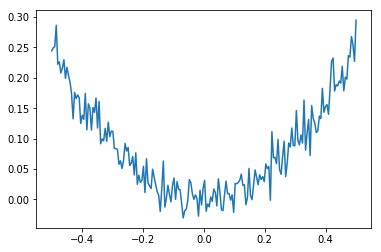

In [4]:
##生成200个随机点
x_data = np.linspace(-0.5,0.5,200).reshape(1,200)   ##生成区间[-.5,.5]200个点，然后转化为1*200的数组
noise = np.random.normal(0,0.02,x_data.shape)  ##生成噪声点，均值为0，方差为0.05 ，大小和x_data一致
y_data = np.square(x_data) + noise

##绘图
plt.plot(x_data.reshape(-1),y_data.reshape(-1))

In [5]:
x_data.shape,y_data.shape

((1, 200), (1, 200))

In [6]:
tf.random_normal([10,1])

<tf.Tensor 'random_normal:0' shape=(10, 1) dtype=float32>

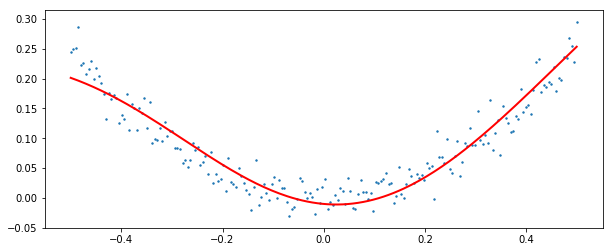

In [8]:
## 定义两个placeholder(大小和上面的x_data一致)
x = tf.placeholder(tf.float32,[1,None])
y = tf.placeholder(tf.float32,[1,None])

##定义神经网络中间层
W1 = tf.Variable(tf.random_normal([10,1]))
b1 = tf.Variable(tf.zeros([10,1]))
Z1 = tf.matmul(W1,x) + b1
A1 = tf.nn.tanh(Z1)   ##激活函数选择tanh

##定义输出层
W2 = tf.Variable(tf.random_normal([1,10]))
b2 = tf.Variable(tf.zeros([1,1]))
Z2 = tf.matmul(W2,A1) + b2
result = tf.nn.tanh(Z2)  ###测试发现tanh的效果比sigmoid效果要好的多

##1.定义损失函数(MSE)
loss = tf.reduce_mean(tf.square(result-y))

##2.定义优化算法
optimizer = tf.train.GradientDescentOptimizer(0.1)

##3.使用优化算法减小loss
train = optimizer.minimize(loss)

##初始化变量
init = tf.global_variables_initializer()

##启动会话

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(2001):
        sess.run(train,feed_dict={x:x_data,y:y_data})
    ##获得预测值
    predict_value = sess.run(result,feed_dict={x:x_data})
##绘制图像
fig =plt.figure(figsize=[10,4])
plt.scatter(x_data,y_data,s=2)
plt.plot(x_data.reshape(200,1),predict_value.reshape(200,1),'r-',lw=2)